Se está buscando obtener aluminio, para lo cual se hacen expediciones a un cinturón de asteroides. Para extraer la bauxita, que contiene el aluminio, hay que romper los asteroides, sin saber de antemano cual es la cantidad que contiene. A través de los mineros se recolectaron datos sobre incrustaciones de piedras violetas (todas de tamaño similar) en la superficie de los asteroides que parecen indicar el peso de bauxita encontrada.

Con los datos recolectados R1 tratar de predecir la bauxita que tendrá un asteroide.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot  as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import val_curves_helper as vc_helper

In [2]:
df = pd.read_csv('R1.csv')

In [3]:
print(df.describe())

       violet_stone_count  bauxite_kg
count          100.000000  100.000000
mean            79.270000    5.986221
std             42.418039    2.177836
min              2.000000    1.728002
25%             48.750000    4.444994
50%             77.000000    5.985403
75%            115.250000    7.643617
max            149.000000    9.832522


In [9]:
print(df.corr())

                    violet_stone_count  bauxite_kg
violet_stone_count            1.000000    0.978164
bauxite_kg                    0.978164    1.000000


Siendo la correlacion 0.9781637250632228

Afirmamos que la relacion lineal entre violet_stone_count y bauxite_kg es muy fuerte.

Se advierte que la presencia de correlacion no implica causalidad

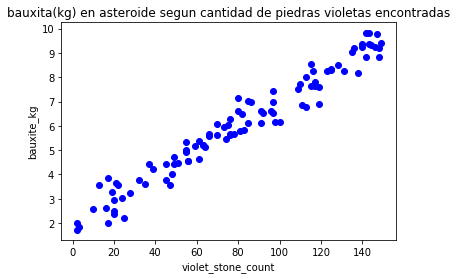

In [10]:
plt.scatter(df.violet_stone_count, df.bauxite_kg, c='blue')
plt.xlabel("violet_stone_count")
plt.ylabel("bauxite_kg")
plt.title("bauxita(kg) en asteroide segun cantidad de piedras violetas encontradas")
plt.show()

- Confirmamos visualmente la relacion lineal entre variables
- Visualmente no se detectan outliers

## Tipo de distribucion ?? 

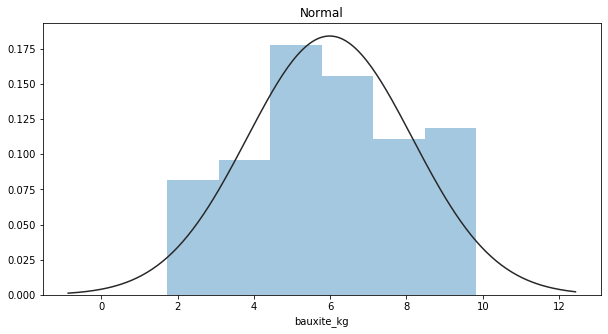

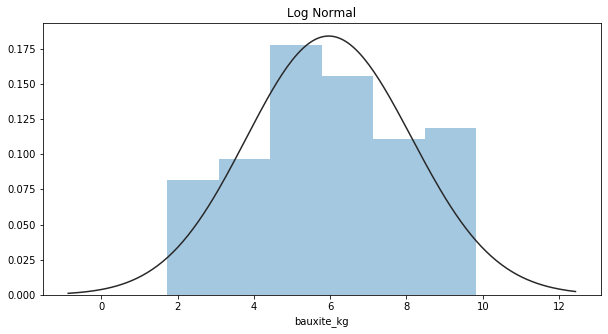

- Pareciera aproximarse a distrib normal, debemos corroborar con un test


In [4]:
x = df.bauxite_kg

plt.figure(1, figsize = [10,5]); plt.title('Normal')
sns.distplot(x, kde=False, fit=stats.norm)

plt.figure(2, figsize = [10,5]); plt.title('Log Normal')
sns.distplot(x, kde=False, fit=stats.lognorm)

plt.show()

print("- Pareciera aproximarse a distrib normal, debemos corroborar con un test")

## Normality Test 

In [24]:
from scipy.stats import shapiro #https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# normality test - shapiro test

stat, p = shapiro(df.bauxite_kg)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.973, p=0.038
Sample does not look Gaussian (reject H0)


In [26]:
from scipy.stats import normaltest #https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# normality test - D’Agostino’s K^2 Test

# normality test
stat, p = normaltest(df.bauxite_kg)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=9.128, p=0.010
Sample does not look Gaussian (reject H0)


In [27]:
from scipy.stats import anderson #https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# normality test - Anderson-Darling Test

# normality test
result = anderson(df.bauxite_kg)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.489
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


Hard Fail

Your data may not be normal for lots of different reasons.
Each test looks at the question of whether a sample was drawn from a Gaussian distribution
from a slightly different perspective.

A failure of one normality test means that your data is not normal.
As simple as that.

You can either investigate why your data is not normal and perhaps
use data preparation techniques to make the data more normal.

Or you can start looking into the use of nonparametric statistical
methods instead of the parametric methods.

Soft Fail

If some of the methods suggest that the sample is Gaussian and some not,
then perhaps take this as an indication that your data is Gaussian-like.

In many situations, you can treat your data as though it is Gaussian and proceed 
with your chosen parametric statistical methods.

"https://stackoverflow.com/questions/7781798/seeing-if-data-is-normally-distributed-in-r/7788452#7788452"
se debate que significa en un test, el rechazo o no de H0, leerlo esta muy bueno la rta aceptada y los comentarios.

## Ajusto modelo

In [14]:
X = df[['violet_stone_count']]
y = df.bauxite_kg

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

regr = LinearRegression().fit(X_train, y_train)
y_pred = regr.predict(X_test)

('Coefficients: ', array([0.05151773]))
('Intercept (Y axis when X = 0): ', 1.893895207495416)
Mean squared error: 0.24
Coefficient of determination: 0.94


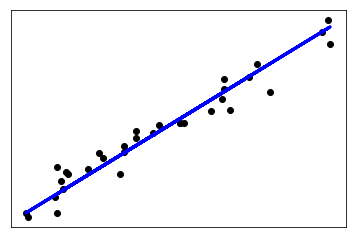

In [15]:
# The coefficients
print('Coefficients: ', regr.coef_)

# The intercept_ 
print('Intercept (Y axis when X = 0): ', regr.intercept_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
#example of use
violet_stones_in_asteroid = 100
violet_stones_in_asteroid = pd.DataFrame([violet_stones_in_asteroid]).to_numpy().reshape(-1, 1)
regr.predict(violet_stones_in_asteroid)

array([[7.04566776]])

# Analisis de performance & sensitividad

In [20]:
data_to_trial = 66
vc_helper.predict_trials(X, y, regr, data_to_trial)

Trial 1: 5.32
Trial 2: 5.32
Trial 3: 5.34
Trial 4: 5.30
Trial 5: 5.29
Trial 6: 5.34
Trial 7: 5.33
Trial 8: 5.29
Trial 9: 5.38
Trial 10: 5.33

Range in values: 0.09


- el rango observado entre Trials no es significativo, por ende se re-valida la uniformidad en la distribucion de datos que podemos observar en el grafico lineal

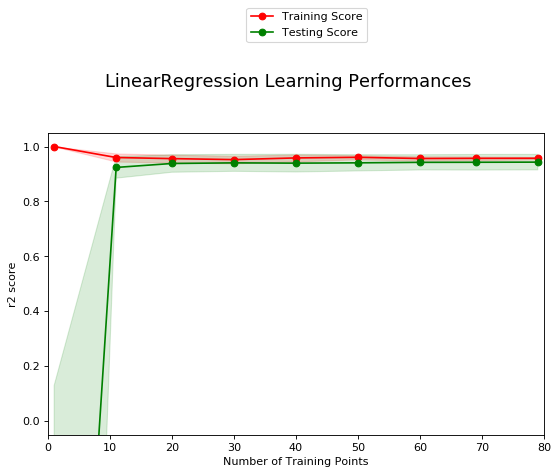

In [7]:
vc_helper.plot_learning_performance(regr, X, y)

- No se observa rastros de overfitting o underfitting
- Se necesitan pocos puntos para que el modelo se ajuste al comportamiento del dataset

## Aclaraciones 

precision instrumento de medicion: Se asume error 0 en instrumentos de medicion.

precision conteo de piedras violetas: Se asume que el conteo por asteroide fue correcto en todos los casos.